# Linear Regression Project: Ecommerce Customers


## Imports


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Get the Data



In [2]:
customers = pd.read_csv('Ecommerce Customers')
customers.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


**Check the head of customers, and check out its info() and describe() methods.**

In [3]:
#check the info of the dataframe
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [4]:
#get the describtion of the dataframe
customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


## Exploratory Data Analysis



In [5]:
customers.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


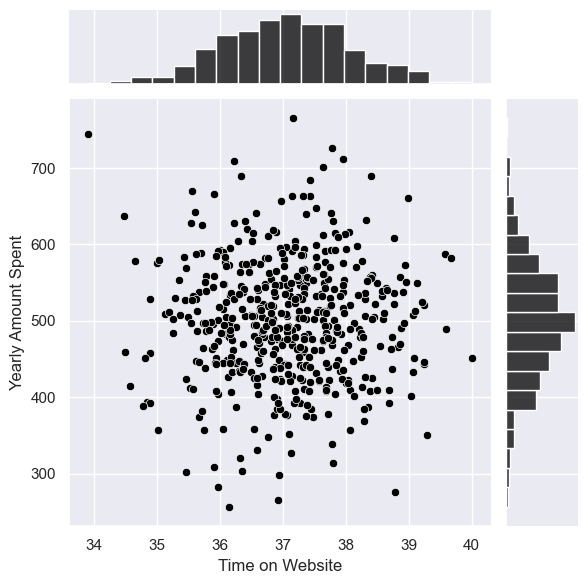

In [18]:
#plot the joint plot
sns.set(style='darkgrid')
sns.jointplot(x=customers['Time on Website'],y=customers['Yearly Amount Spent'],data=customers,kind='scatter',color='black')
plt.show()

** Do the same but with the Time on App column instead. **

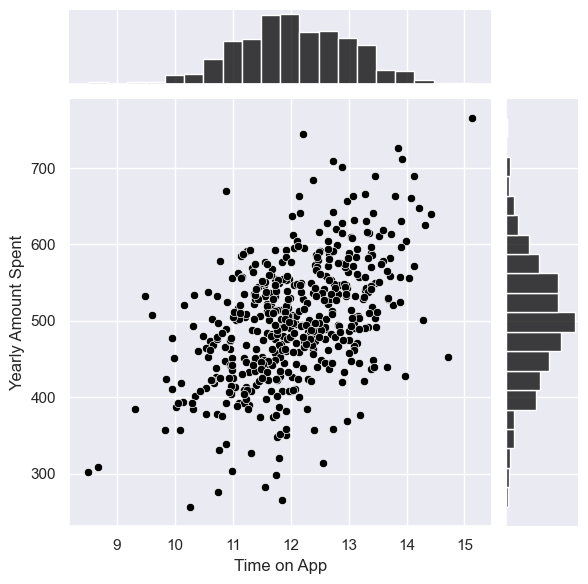

In [35]:
sns.set(style='darkgrid')
sns.jointplot(x=customers['Time on App'],y=customers['Yearly Amount Spent'],data=customers,kind='scatter',color='black')
plt.show()

** Use jointplot to create a 2D hex bin plot comparing Time on App and Length of Membership.**

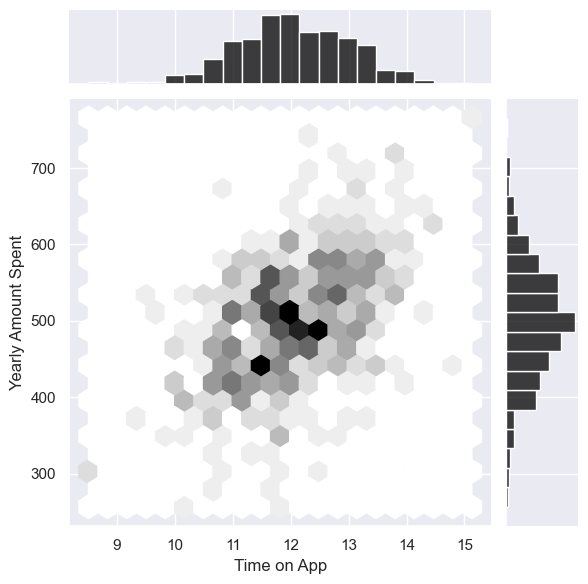

In [20]:
sns.set(style='darkgrid')
sns.jointplot(x=customers['Time on App'],y=customers['Yearly Amount Spent'],data=customers,kind='hex',color='black')
plt.show()

**Let's explore these types of relationships across the entire data set. Use [pairplot](https://stanford.edu/~mwaskom/software/seaborn/tutorial/axis_grids.html#plotting-pairwise-relationships-with-pairgrid-and-pairplot) to recreate the plot below.(Don't worry about the the colors)**

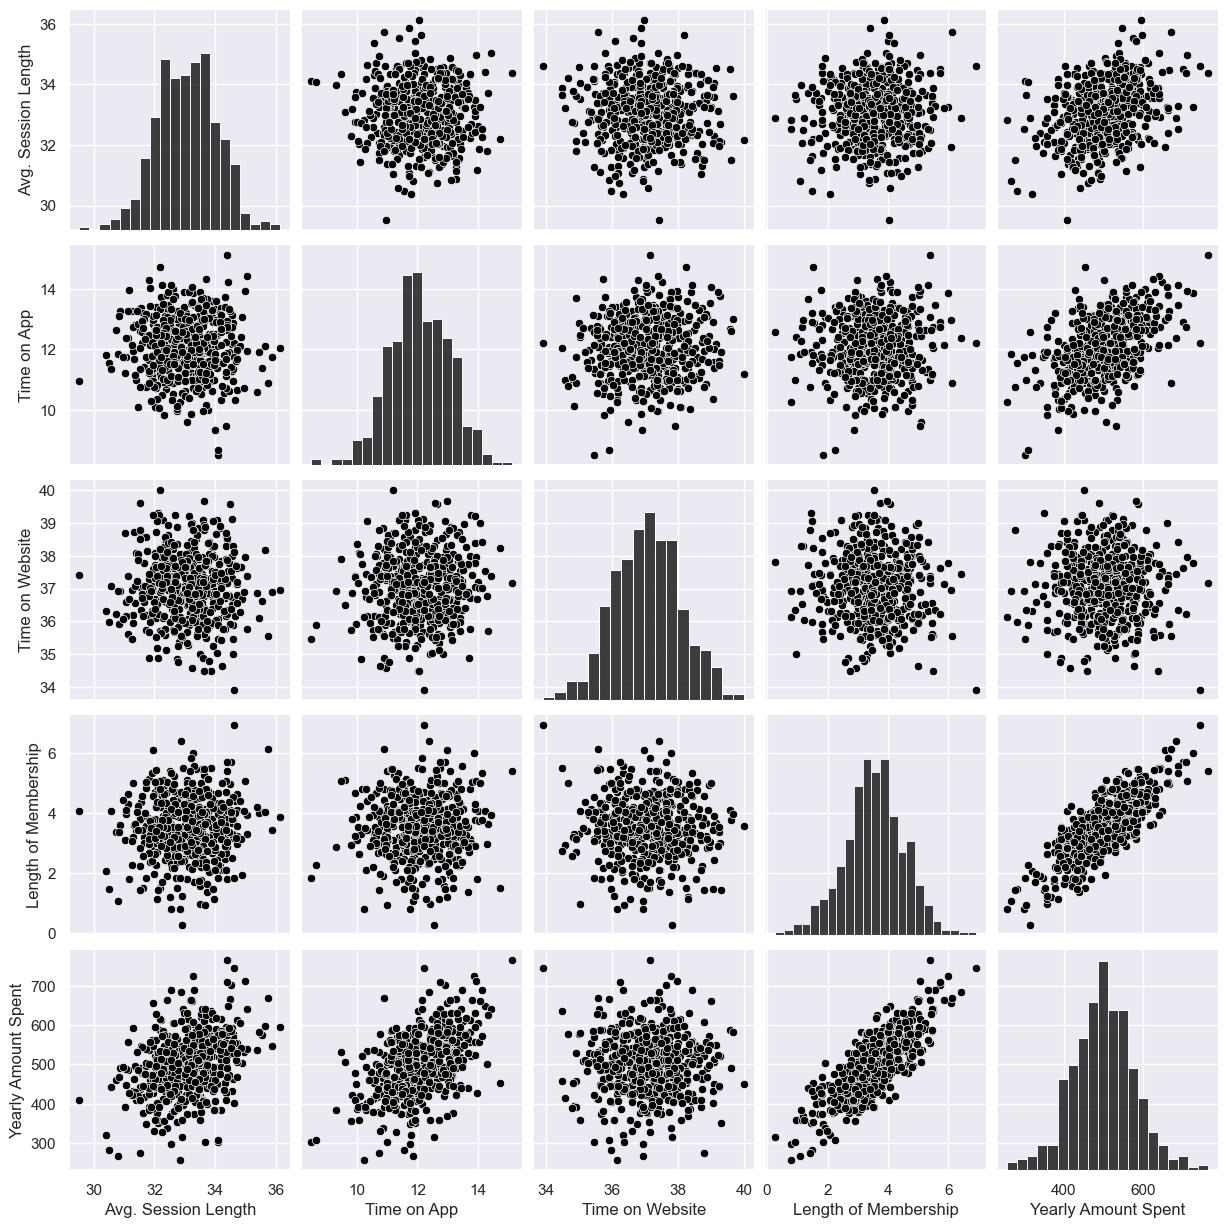

In [33]:
sns.set(style='darkgrid')
sns.set_palette(sns.color_palette(['#000000']))
sns.pairplot(data=customers)
plt.show()

**Based off this plot what looks to be the most correlated feature with Yearly Amount Spent?**

**Create a linear model plot (using seaborn's lmplot) of  Yearly Amount Spent vs. Length of Membership. **

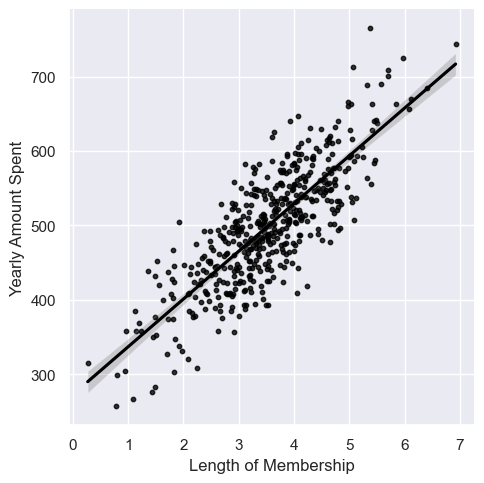

In [31]:
sns.set(style='darkgrid')
sns.set_palette(sns.color_palette(['#000000']))
sns.lmplot(x='Length of Membership',y='Yearly Amount Spent',data=customers,scatter_kws={'s': 10})

## Training and Testing Data



In [38]:
customers.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [40]:
x = customers[['Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership']]
y = customers[['Yearly Amount Spent']]

In [41]:
#train the data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=101)

## Training the Model


**Create an instance of a LinearRegression() model named lm.**

In [42]:
#training and testing the model
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(x_train,y_train)

LinearRegression()

** Train/fit lm on the training data.**

**Print out the coefficients of the model**

In [43]:
lm.coef_

array([[25.69154034, 37.89259966,  0.56058149, 61.64859402]])

## Predicting Test Data


In [47]:
predict = lm.predict(x_test)

** Create a scatterplot of the real test values versus the predicted values. **

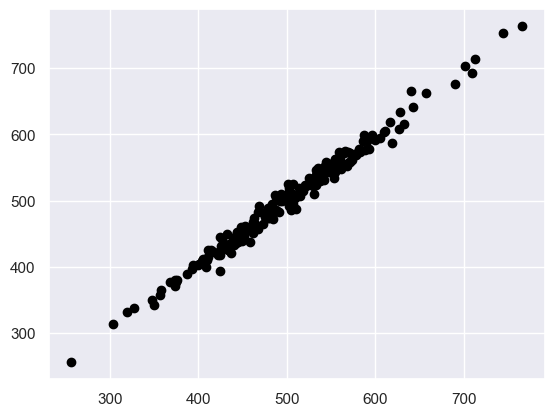

In [51]:
plt.scatter(y_test,predict,color='black')

## Evaluating the Model



In [53]:
from sklearn import metrics
MAE = metrics.mean_absolute_error(y_test,predict)
MSE = metrics.mean_squared_error(y_test,predict)
RMSE = np.sqrt(metrics.mean_squared_error(y_test,predict))

print(f'MAE: {MAE}')
print(f'MSE: {MSE}')
print(f'RMSE: {RMSE}')

MAE: 7.74267128583871
MSE: 93.83297800820037
RMSE: 9.68674238370157


## Residuals


C:\Users\ainur\AppData\Local\Temp\ipykernel_7196\205671413.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test-predict),color='black')


<Axes: ylabel='Density'>

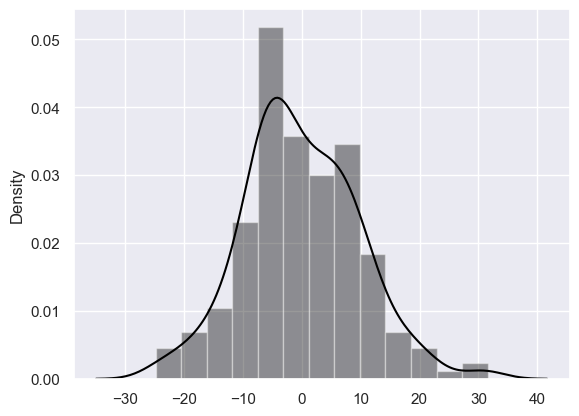

In [56]:
#histogram of the residuals
sns.distplot((y_test-predict),color='black')